In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import urllib.request

df = pd.read_csv('age_gender.csv')

df.head(15)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


In [55]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


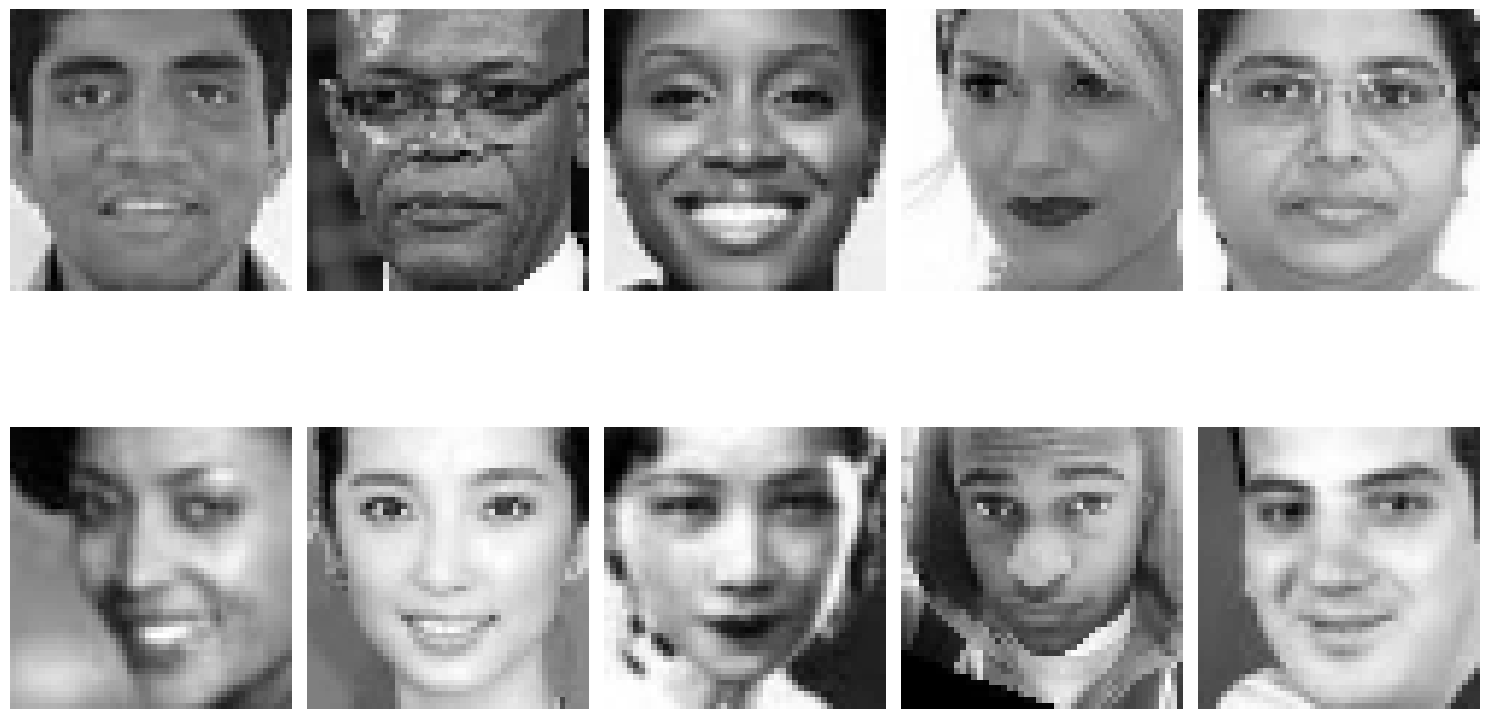

In [56]:
def reconstruct_image(pixel_data):
    pixel_values = list(map(int, pixel_data.split()))
    
    image_array = np.array(pixel_values).reshape(48, 48)
    
    return image_array

num_images = 10 
images_per_row = 5

fig, axes = plt.subplots(nrows=num_images // images_per_row, ncols=images_per_row, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        pixel_data = df.sample(10).iloc[i]['pixels']
        image_array = reconstruct_image(pixel_data)
        ax.imshow(image_array, cmap='gray')
        ax.axis('off')

plt.tight_layout()
plt.show()

In [64]:
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

gender_counts['gender'] = gender_counts['gender'].replace({0: 'Male', 1: 'Female'})

fig = px.bar(gender_counts, x='gender', y='count', title='Gender Distribution', labels={'count':'Count', 'gender':'Gender'})
fig.show()

In [65]:
ethnicity_counts = df['ethnicity'].value_counts().reset_index()
ethnicity_counts.columns = ['ethnicity', 'count']

ethnicity_labels = {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Others (including Hispanic, Latino, Middle Eastern)'}
ethnicity_counts['ethnicity'] = ethnicity_counts['ethnicity'].replace(ethnicity_labels)

fig = px.bar(ethnicity_counts, x='ethnicity', y='count', title='Ethnicity Distribution', labels={'count': 'Count', 'ethnicity': 'Ethnicity'})
fig.show()

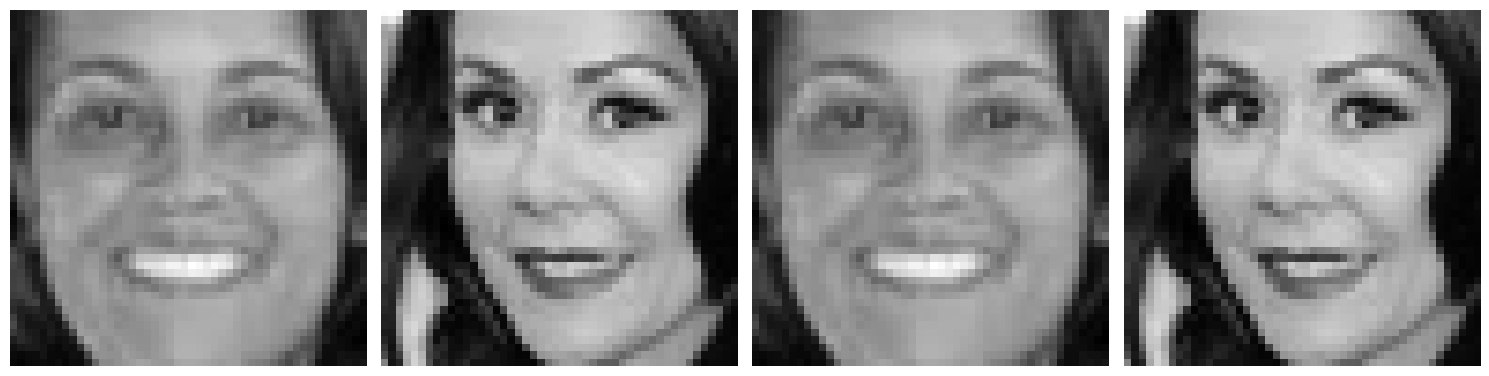

In [59]:
df_age_45 = df[df['age'] == 45]

def reconstruct_image(pixel_data, ax):
    pixel_values = list(map(int, pixel_data.split()))
    
    image_array = np.array(pixel_values).reshape(48, 48)
    
    ax.imshow(image_array, cmap='gray')
    ax.axis('off')

gender_0_images = df_age_45[df_age_45['gender'] == 1].sample(2, random_state=42)
gender_1_images = df_age_45[df_age_45['gender'] == 1].sample(2, random_state=42)

selected_images = pd.concat([gender_0_images, gender_1_images])

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, ax in enumerate(axes.flat):
    pixel_data = selected_images.iloc[i]['pixels']
    reconstruct_image(pixel_data, ax)

plt.tight_layout()
plt.show()

/tmp/ipykernel_84861/1403922756.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



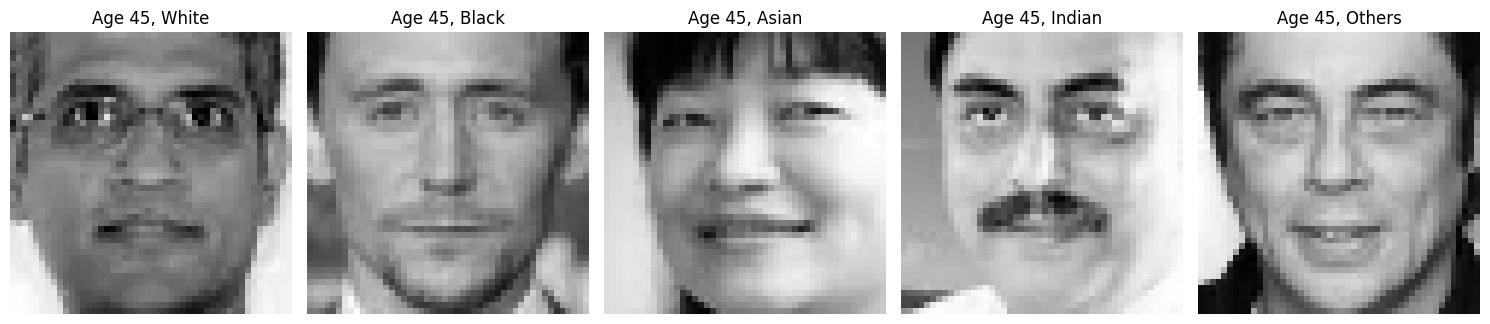

In [74]:

ethnicity_labels = {
    0: 'White',
    1: 'Black',
    2: 'Asian',
    3: 'Indian',
    4: 'Others'
}

selected_images = df_age_45.groupby('ethnicity', group_keys=False).apply(lambda x: x.sample(1)).reset_index(drop=True)

fig, axes = plt.subplots(1, len(ethnicity_labels), figsize=(15, 5))

for i, ax in enumerate(axes.flat):
    pixel_data = selected_images.iloc[i]['pixels']
    image_array = reconstruct_image(pixel_data)
    ax.imshow(image_array, cmap='gray')
    ethnicity = ethnicity_labels[selected_images.iloc[i]['ethnicity']]
    ax.set_title(f'Age 45, {ethnicity}')
    ax.axis('off')

plt.tight_layout()
plt.show()